# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

 1)After reading the abstract in Tidy Data by Hadley Wickham,the paper is about data tidying and how having tidy datasets, which have a specific structure: one variable per column and one observation per row, can simply data manipulation, modeling and visualization. It also allows for easier development of tidy tools which are used to output and input tidy datasets.

 2)After reading the introduction, the "tidy data standard" is intending to accomplish making data analysis easier. If there is a certain standard for data sets, then initial data cleaning becomes simplier as one doesn't have to go about "reinvent[ing] the wheel [essentially creating a standard] every time."(Wickham). This standard also is supposed to make developing data analysis tools simplier.

 3)After reading the first intro to section 2, the sentence "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." means tidy datasets are like happy families; they share the same characterisitc of happiness, or in this case, the tidy datsets are all structured in the same way. Messy datasets are unique in what they are "messy" in. There is no specific structure. The sentence, "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general." is saying that when looking at a dataset, what the observations and variables are are easy enough to figure out. The variables are each column and the observations are each row, however beyond that, when thinking about how one can define observations and variables in an abstract sense applicable to all datasets, it becomes difficult without a structure like tidy datasets.

 4)Wickham defines values as data points which can either be quantitative or strings (qualitative). They belong to an observation and variable. A variable is the collection of values that measure a same specific attribute such as height or temperature across units. An observation, on the other hand, has values that are associated to the same unit (A person for example) across all attributes or variables.

 5) Wickham defines "Tidy Data" as a way of mapping a datasets meaning to it's structure. The structure is defined as:
  1. Each variable forms a column.
  2. Each observation forms a row.
  3. Each type of observational unit forms a table.

(Wickham)

6) The 5 most common problems with messy datasets are:
  
    • Column headers are values, not variable names.
    • Multiple variables are stored in one column.
    • Variables are stored in both rows and columns.
    • Multiple types of observational units are stored in the same table.
    • A single observational unit is stored in multiple tables.
  
  (Wickham)

The data in table 4 is messy because because it is tabular data: variables form both rows and columns and column headers are values. The column headers in table 4 are values of the variable income and variable frequency forms rows in accordance with each religious group. "Melting" a dataset is essentially converting whatever columns that are not individual variables, into 2 columns/variables. 1 column/variable contains the previous column header values repeating for each value of the colvar(column that already represents a variable). For table 4, the column header values, which represent income, are combined into a column and repeat for however many religious groups there are. The 2nd column/variable contains the previous values for each previously seperated column headers. For table 4, the frequency values are all put in a single column to match the income range and religion.

7)Table 11 is messy because it variables stored in both rows and columns. Specifically, the colvars, id, year, and month are spread across columns of days and rows of temperatures. The table contains a column named element, but that is not a variable itself; it is storing tmax and tmin which are variables. Table 12, on the otherhand, is tidy and "molten" because the columns that are not a colvar is split into 2 columns. 1 column contains the headings, in this case, the days which are combined with the month and the year columns to form a date. The values of the previous column headers, which represented the minimum and maximum temperature on a given day, are put under their respective column tmax or tmin. Therefore, table 12 has 4 variables, id, date, tmax, and tmin, each with their own column and 1 observation has values of each variable in a row.

8) The "chicken and the egg" problem with tidy data is essentially that the tidy data structure is only useful if  there are data tools to work with it. This makes data tools linked to the tidy data structure. This means if one changes the data structure or data tool independently, workflow will not improve as both are interlinked. Wickham hopes to use methodologies from the fields of human factors, user-centered design, and human computer interactions, to improve on the understanding of the "cognitive side" of data analysis. He also mentions other formulations of tidy data, specifially, to deal with data in multidimentional arrays. He leaves us to wonder if the other aspects of data wrangling could also be improved on.



**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [68]:
import numpy as np
import pandas as pd
#1)
df = pd.read_csv('/content/airbnb_hw.csv', low_memory=False) #Reading in file
var = 'Price' #Setting var to Price
df[var]= df[var].str.replace(',','') #Removing commas in Price column
print('Before coercion: \n', df[var].describe(),'\n')#Price variable is type object
df[var]=pd.to_numeric(df[var],errors = 'coerce') #Coercing Price to numeic
df[var+'_nan'] = df[var].isnull()#Creating missing values dummy
print('After coercion: \n', df[var].describe(),'\n')#Price varible is numeric
print('Total Missings: \n', sum(df[var+'_nan']),'\n')#Total Missing = 0
print(df[var].unique())

Before coercion: 
 count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object 

After coercion: 
 count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64 

Total Missings: 
 0 

[  145    37    28   199   549   149   250    90   270   290   170    59
    49    68   285    75   100   150   700   125   175    40    89    95
    99   499   120    79   110   180   143   230   350   135    85    60
    70    55    44   200   165   115    74    84   129    50   185    80
   190   140    45    65   225   600   109  1990    73   240    72   105
   155   160    42   132   117   295   280   159   107    69   239   220
   399   130   375   585   275   139   260    35   133   300   289   179
    98   195    29    27    39   249   192   142   169  1000   131   138
   113   122   329   101   475   238   272   308   126   2

In [7]:
#2)
df = pd.read_csv('/content/sharks.csv', low_memory=False)#Reading in file
var = "Type"#Setting var to Type
print(df[var].unique())
print(df[var].value_counts())
df[var]=df[var].replace(['Boat','Boatomg'],'Boating')#Replacing 'Boat' and
#'Boatomg' to "Boating" - Same variable basically
df[var]=df[var].replace(['Unverified','Under investigation'],'Unconfirmed')
#^ 'Unverified'and 'Under investigation' are basically 'Unconfirmed'
df[var+'_nan'] = df[var].isnull()#Creating dummy variable for any value that's missing
print(df[var].unique())
print(df[var].value_counts())
print('Total Missings: \n', sum(df[var+'_nan']),'\n')# 5 values were missing

['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Unverified' 'Invalid' 'Under investigation' 'Boating' 'Sea Disaster' nan
 'Boat' 'Boatomg']
Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Watercraft              142
Boat                    109
Boating                  92
Questionable             10
Unconfirmed               1
Unverified                1
Under investigation       1
Boatomg                   1
Name: Type, dtype: int64
['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Invalid' 'Boating' 'Sea Disaster' nan]
Unprovoked      4716
Provoked         593
Invalid          552
Sea Disaster     239
Boating          202
Watercraft       142
Questionable      10
Unconfirmed        3
Name: Type, dtype: int64
Total Missings: 
 5 



In [72]:
#3)
df = pd.read_csv('/content/PreTrial.csv',low_memory=False)
df = df.rename(columns = {'WhetherDefendantWasReleasedPretrial':'Released'})
var = 'Released'
print("Before cleaning: "+ str(df[var].unique()))
df[var] = df[var].replace(1,'Yes')# "Yes" released
df[var] = df[var].replace(0,'No')#"No" not released
df[var] = df[var].replace(9, np.nan)#Replaced 9 with nan
df[var+'_nan'] = df[var].isnull()#Created dummy variable
print("After cleaning: "+str(df[var].unique()))
print(df[var].value_counts())
print('Total Missings: \n', sum(df[var+'_nan']),'\n')#31 missing values



Before cleaning: [9 0 1]
After cleaning: [nan 'No' 'Yes']
Yes    19154
No      3801
Name: Released, dtype: int64
Total Missings: 
 31 



In [73]:
#4)
df = df.rename(columns = {'ImposedSentenceAllChargeInContactEvent' : 'IncarcerationSentenceInMonths'})#Renaming column
var = 'IncarcerationSentenceInMonths'
df[var]=pd.to_numeric(df[var],errors = 'coerce')#converting to numeric values
df[var+'_nan'] = df[var].isnull()#creating dummy for null values
print('Total Missing: ',sum(df[var+'_nan']))#9053 values missing

Total Missing:  9053


After excluding nonprison sentences: 
 count    13933.000000
mean        15.462366
std         61.214668
min          0.000000
25%          0.000000
50%          0.000000
75%          6.000000
max       2208.000000
Name: IncarcerationSentenceInMonths, dtype: float64 



<Axes: >

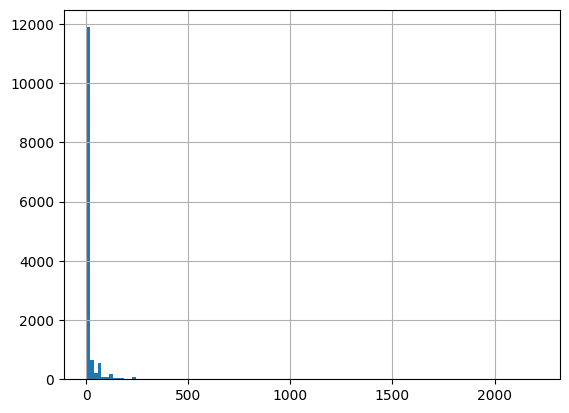

In [13]:
df = df.rename(columns = {'SentenceTypeAllChargesAtConvictionInContactEvent': 'IncarcerationSentenceType'})#Renaming column
var2 = 'IncarcerationSentenceType'
#From looking at the full codebook from vcsc.virginia.gov it can be seen that when
#IncarcerationSentenceType is 4(Other, all charges in cohort contact resulted in pending, dismissed,
#deferred, etc) or 9 (Not applicable (e.g., disposition record not found, or unknown))
# Null values exist for the sentence.
df.loc[df[var2] == 9, var] = np.nan #9 is unknown so values should just be nan
df['chargesPendingDeferredDismissed'] = (df[var2]==4) #Create dummy for 4 because
#charges could be pending, defferred, or dismissed
df[var]=df[var].mask(df[var2]==4,np.nan)#Those with IncarcerationSentenceType of 4
#should now be nan
#sentenceWhenType0 = df['var'][df['var2'] == 0].tolist()
#print(sentenceWhenType0 - I noticed that when IncarcerationSentenceType was 0
#which means "Probation/no incarceration", the IncarcerationSentence showed the
#time under probation/no incarceration which might get confusing because they
#techincally wern't sent to prison, and the other 2 categories were.
df['Probation/NoIncarceration'] = (df[var2]==0)# Therefore, I created dummy for
# when sentence type was 0
df[var]=df[var].mask(df[var2]==0,0)#replaced all the IncarecerationSentenceInMonths
#values to 0 when sentence type was 0. So now IncarcerationSentenceInMonths represents
#time that people were jailed.
df[var+'_nan'] = df[var].isnull()#updated dummy to include new nan values
print('After excluding nonprison sentences: \n', df[var].describe(),'\n')
binNum = int(np.sqrt(13933))
df[var].hist(bins = binNum)#Visualization




**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [29]:
#1)
import seaborn as sns
df = pd.read_csv('/content/airbnb_hw.csv', low_memory=False) #Reading in file
var = 'Price' #Setting var to Price
df[var]= df[var].str.replace(',','') #Removing commas in Price column
df[var]=pd.to_numeric(df[var],errors = 'coerce') #Coercing Price to numeic
df[var+'_nan'] = df[var].isnull()#Creating missing values dummy
#2)
print(df.shape)#Dimentions =(30478 rows, 14 columns) Therefore, 30478 observations.
print(df.columns.tolist()) #The variables are: 'Host Id', 'Host Since', 'Name',
#'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type',
#'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price',
#'Review Scores Rating', 'Price_nan']
print(df.head())
#3)
pd.crosstab(df['Room Type'],df['Property Type'])
#Patterns: Properties such as Apartments, House, and Loft have lot a lot of values
#for all the roomtypes which means they're probably the most available/sought after
#There does not seem to be a preference for shared rooms across all property types
#Properties where private rooms are more common than renting entire property: Bed
#& Breakfast, Dorm, House, Hut, Other, Tent, and Treehouse


(30478, 14)
['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating', 'Price_nan']
    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                         NaN     Private room  10032.0

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


<Axes: xlabel='Price', ylabel='Count'>

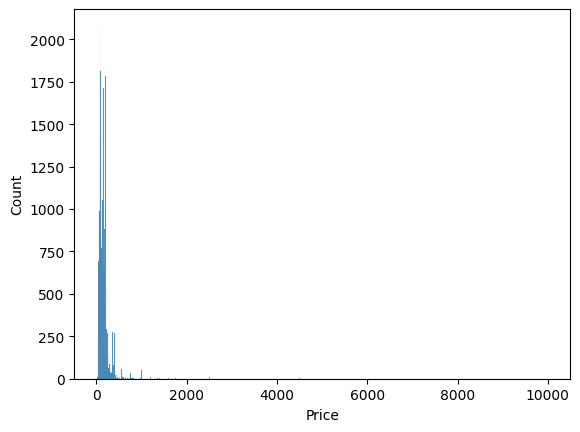

In [32]:
#4)
sns.histplot(df['Price'])
#scaling off

<Axes: xlabel='Price', ylabel='Density'>

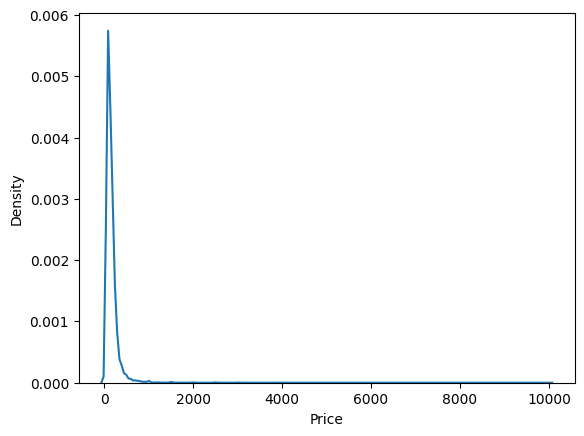

In [33]:
sns.kdeplot(df['Price'])
#scaling off

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64


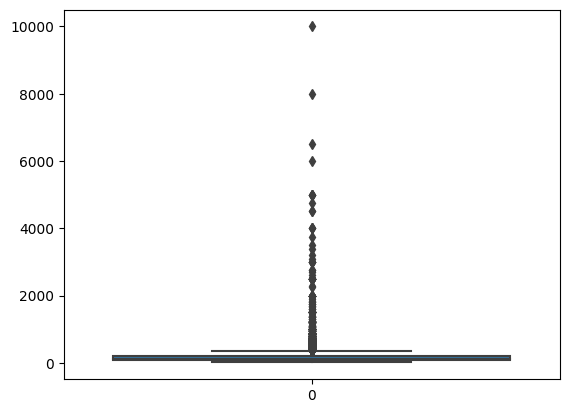

In [34]:
sns.boxplot(df['Price'])
print(df['Price'].describe())
#outliers ruin box

<Axes: xlabel='price_log', ylabel='Count'>

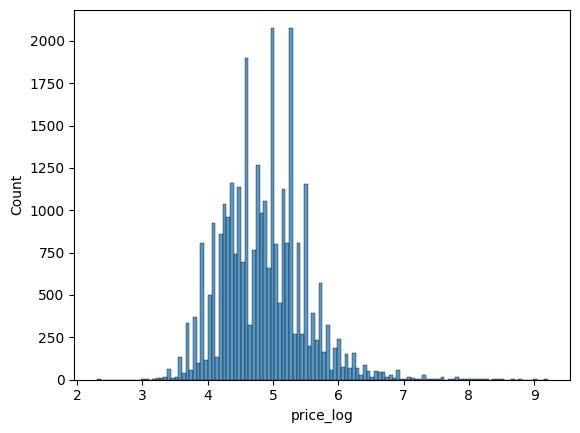

In [36]:
var = 'price_log'
df[var] = np.log(df['Price'])
sns.histplot(df[var])

<Axes: xlabel='price_log', ylabel='Density'>

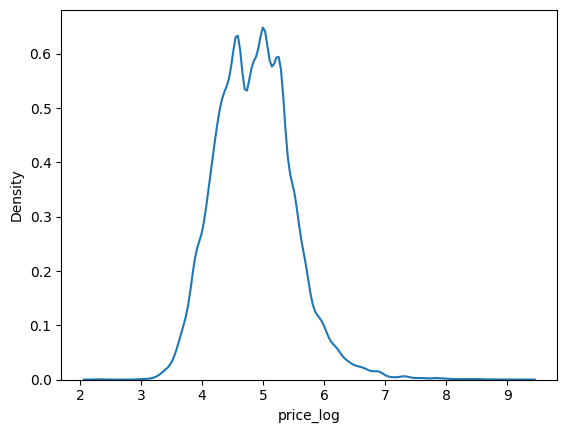

In [37]:
sns.kdeplot(df[var])

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: price_log, dtype: float64


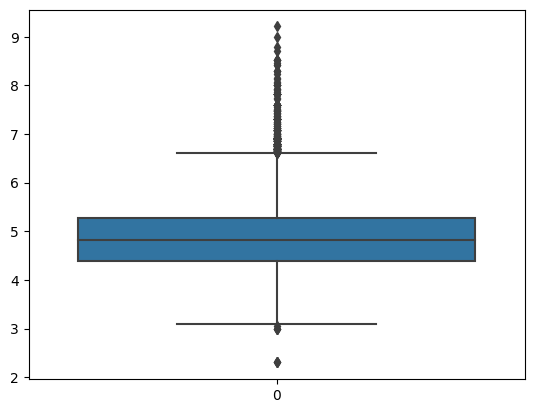

In [39]:
sns.boxplot(df[var])
print(df[var].describe())

        count         mean          std    min     25%    50%      75%  \
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.21758

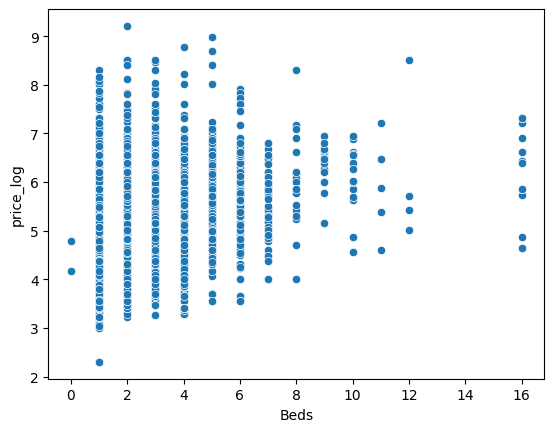

In [61]:
#5)
sns.scatterplot(x=df['Beds'],y=df[var])
#The scatterplot has rows of points columns of points corresponding to the number
#of beds (1,2,3, etc).Even at lower bed numbers such as 1 and 2, the price has a
#wide range, then range shortens as the number of beds inceases and goes towards
#the center of the price range.
group = df.groupby('Beds')['Price'].describe()
print(group)
#As the number of beds increase, the mean price increases. However its more variable
#past 6 beds. For example, the mean prices for 7,9, and 10 beds were all below the
#the mean price for 3 beds. The mean price for 16 beds was below the mean price for
#beds. The standard deviation also increases till 5 beds, after which it's more variable.
#For example, the data at 16 beds is more closer to its mean than 5 beds.


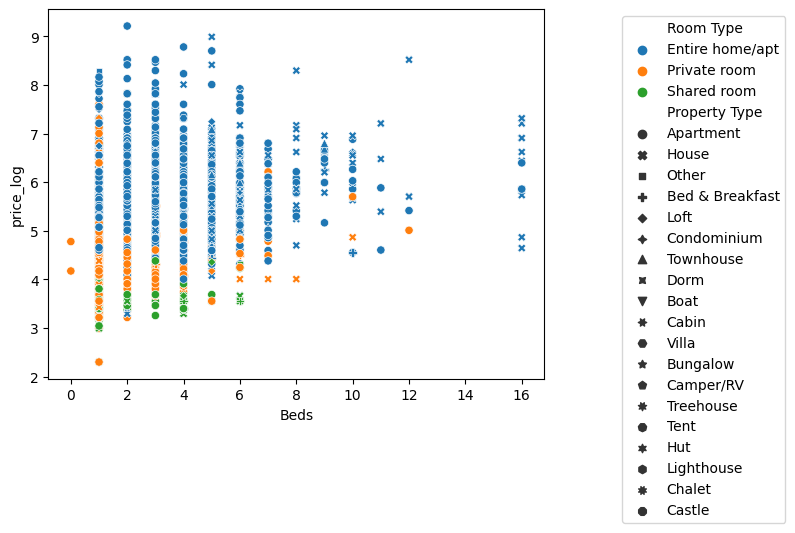

In [63]:
#6)
plot = sns.scatterplot(x=df['Beds'],y=df[var], hue = df['Room Type'],style = df['Property Type'])
sns.move_legend(plot,'upper right', bbox_to_anchor = (1.5,1))
#Entire home/apt consists of the majority of the rentals with the majority
#apart from a few, going from mid price range to high price range. Private rooms
#seem to be the second most and most are right below/mixed with Entire home/apt
#in terms of price range. The shared room seems to be the cheaper option across
#all bed numbers.


In [65]:
group2 = df.groupby(['Room Type', 'Property Type'])['Price'].describe()
print(group2)
#The room type of Entire home/apt with the property type of Other seems to have
#the highest average price ($843. Not counting Other, renting an entire Villa is
#the most expensive. The highest standard deviation also goes to renting out
#entire 'Other' (1133). Not counting Other, renting an entire Villa also had the
#highest standard deviation. The median appears to be a more reliable estimate
#of central tendency because many of the categories have outliers which skew the
#mean. For example, the group Other and Entire home/apt has a mean of 843 but the
#median actually shows 300. This is because the max for this category was 4000.

                                   count        mean          std    min  \
Room Type       Property Type                                              
Entire home/apt Apartment        15669.0  213.224839   218.097834   10.0   
                Bed & Breakfast     13.0  184.538462   119.814172   85.0   
                Boat                 7.0  158.428571    51.110524  100.0   
                Bungalow             4.0  150.750000    46.464144   87.0   
                Cabin                1.0  250.000000          NaN  250.0   
                Camper/RV            6.0  114.333333   107.685963   45.0   
                Condominium         72.0  304.861111   266.197497   80.0   
                Dorm                 4.0   44.250000    24.060687   30.0   
                House              752.0  297.263298   468.409428   27.0   
                Lighthouse           1.0   39.000000          NaN   39.0   
                Loft               392.0  330.510204   321.519721   55.0   
            

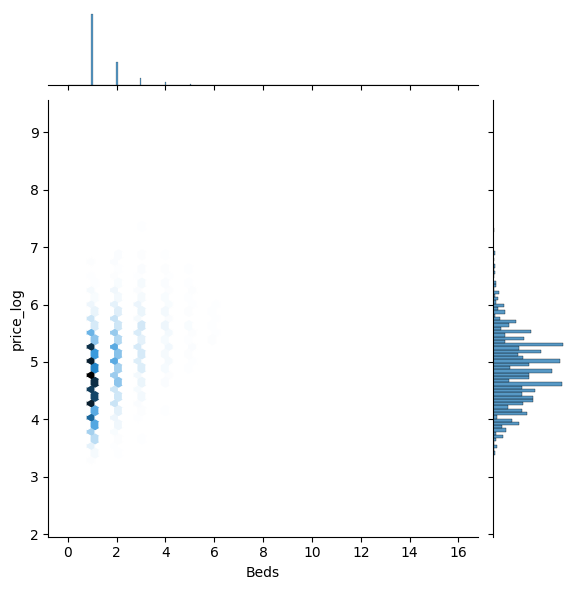

In [67]:
#7)
sns.jointplot(x='Beds',y=var,data = df, kind = 'hex')
#Most of the data is distributed near 1,2,3, and 4 beds with the price almost
#having a normal distribution. Looking plot 5 and 6, the data seems much more
#spread out. From those plots, I would've thought the data is spread across beds
#1-6 with 1 through 4 beds have the some more points. Looking at this jointplot,
#I realize the concentration of data at beds 1-4 is much more greater than I
#first imagined.

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.